In [ ]:
# Dominik Csatári | FV1TW4 | 2024.01.09.
# My Kaggle User is: Dominik Csatári | https://www.kaggle.com/dominikcsatri
# For the codes, I've created are highly contributed wiht general documentation code
# from https://scikit-learn.org  as this is where I have learned, how to use, each
# type of estimator, or what hyperparemeters can be tuned, what libraries are recommended to use.

#Set random_seed:
random_seed = 42

In [58]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import csv
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, pipeline, ensemble, tree, datasets, cluster


In [51]:
# At this part i read in the files.
X = pd.read_csv('pc_X_train.csv')
Final_X_test = pd.read_csv('pc_X_test.csv')
Y = pd.read_csv('pc_y_train.csv')
X = X.drop(X.columns[0], axis=1)
Final_X_test = Final_X_test.drop(Final_X_test.columns[0], axis=1)

# Split our data for training and testing our model
random_seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y['score'], test_size=0.2, random_state=random_seed)


In [41]:
# This function is for writing out our final predicted y to a file for later upload
def WriteOutput(data,file_path="output.csv"):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        writer.writerow(['id', 'score'])
        
        for idx, score in enumerate(data):
            writer.writerow([idx, score])

In [42]:
# This code part is written by me assisted with ChatGBT
# there is sklearn libary for it, which I already used,
# but for me it was easier to work with.

#0 0.001, 0.01, 0.1, 1, 10
def drop_low_variance_columns(X_train_pca, threshold=0.001):
    Dropped = []
    
    # Calculate the variance for each column
    variances = np.var(X_train_pca, axis=0)
    
    # Identify columns with variance below the threshold
    low_variance_columns = np.where(variances < threshold)[0]
    
    # Drop low variance columns and store the column numbers in 'Dropped'
    X_train_pca = np.delete(X_train_pca, low_variance_columns, axis=1)
    Dropped.extend(low_variance_columns)

    print("Remaining Features:", X_train_pca.shape)
    return X_train_pca, Dropped


X_train_dropped, Dropped = drop_low_variance_columns(X_train)
X_test_dropped = np.delete(X_test, Dropped, axis=1)

X_new, Dropped = drop_low_variance_columns(X)

print("Dropped columns:", Dropped)


Remaining Features: (1580, 370)
Remaining Features: (1976, 370)
Dropped columns: [62, 63, 68, 69, 70, 114, 263, 264, 269, 273, 296, 297, 299, 300, 302, 303, 306, 309, 320, 323, 326, 327, 329, 330, 332, 335, 338, 339, 341, 344, 345, 347, 350, 351, 353, 354, 356, 357, 359, 360, 362, 363, 365, 366, 368, 369, 371, 372, 374, 375, 377, 378, 380, 381, 383, 384, 386, 387, 389, 390, 392, 393, 395, 400, 401, 403, 404, 410, 416, 417, 418, 419, 422, 425, 430, 431, 433, 434, 436, 437, 439, 440, 442, 443, 445, 446, 448, 449, 451, 452, 454, 455, 457, 458, 460, 461, 463, 464]


In [45]:
Final_X_test =np.delete(Final_X_test, Dropped, axis=1)

In [46]:
# Converting with PCA all the data below:

scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)
Final_X_test_new = scaler.fit_transform(Final_X_test)

pca = PCA(n_components='mle',svd_solver='full')
X_new_PCA = pca.fit_transform(X_new)
Final_X_test_PCA = pca.transform(Final_X_test_new) 


In [8]:
# It is for train and test set, the above is for all:

scaler = StandardScaler()
X_train_dropped = scaler.fit_transform(X_train_dropped)
X_test_dropped = scaler.fit_transform(X_test_dropped)

pca = PCA(n_components='mle',svd_solver='full')
X_train_dropped_PCA = pca.fit_transform(X_train_dropped)
X_test_dropped_PCA = pca.transform(X_test_dropped) 

In [ ]:
# Uploading traind svm modelprediction, fitted on pca.

regr = svm.SVR(C=1,epsilon=0.3578947368)
regr.fit(X_new_PCA, Y['score'])
y_pred = regr.predict(Final_X_test_PCA)


In [ ]:
WriteOutput(y_pred,"SVM_AllData.csv")

K-Means and various usage

In [ ]:
# At the end of this section, I just tried different models with different cluster sizes ina  trial and error way changed something up in the pipeline

C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Comp 1', ylabel='Comp 2'>

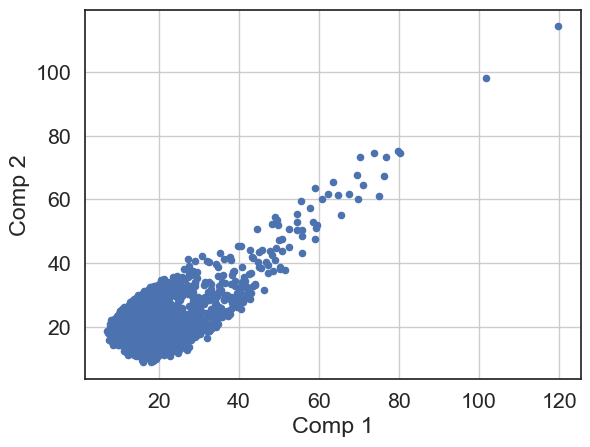

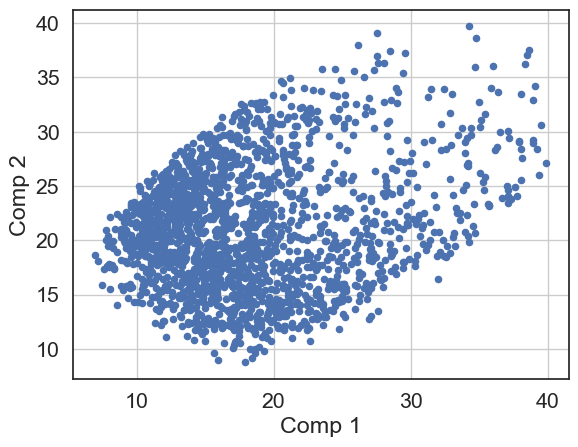

In [ ]:
# Inspired by: https://medium.com/analytics-vidhya/less-known-applications-of-k-means-clustering-dimensionality-reduction-anomaly-detection-and-908f4bee155f
# Code part has also been taken from here.
# This shows how to detect outliers.

sns.set(style = 'white', font_scale = 1.4)

CutOff = 40

kmeans = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = 2)).fit(X)

# Store transformed dimensions
lower_dim = pd.DataFrame(kmeans.transform(X), columns = ['Comp 1', 'Comp 2'])

# Modify lower_dim to remove outliers
lower_dim_NoOutliers = lower_dim[(lower_dim['Comp 1'] < CutOff) & (lower_dim['Comp 2'] < CutOff)]


lower_dim.plot.scatter( x='Comp 1',y= 'Comp 2', grid = True)
lower_dim_NoOutliers.plot.scatter( x='Comp 1',y= 'Comp 2', grid = True)




From the article: "Component 1 measures the distance of each point from Cluster Center #1" and for Comp 2 -> distance from Center 2#
"Anomaly detection: The larger the distance of a point from the cluster centers, the more the more chances it has of being an anomaly."

For PCA And Variance controlled Results:

C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Comp 1', ylabel='Comp 2'>

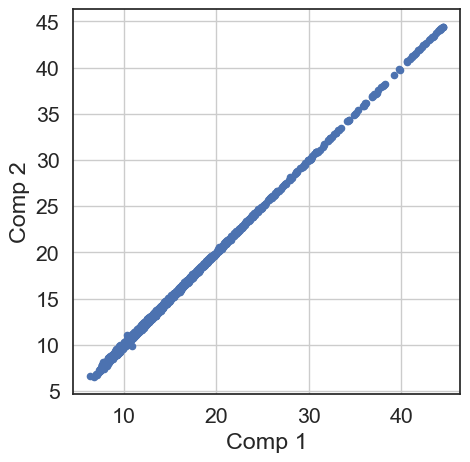

In [ ]:
sns.set(style = 'white', font_scale = 1.4)

kmeans = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = 2)).fit(X_new_PCA)

# Store transformed dimensions
lower_dim = pd.DataFrame(kmeans.transform(X_new_PCA), columns = ['Comp 1', 'Comp 2'])
lower_dim.plot.scatter( x='Comp 1',y= 'Comp 2', grid = True, figsize = (5, 5))


In [47]:
km = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = 5), linear_model.LinearRegression())
score = model_selection.cross_val_score(km, X_train, Y_train, cv = 10, scoring = 'r2')
print(f'Average r2: {np.mean(score)}')


C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Average r2: 0.458818857387175


In [38]:
km = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = 15), svm.SVR())
score = model_selection.cross_val_score(km, X_train, Y_train, cv = 10, scoring = 'r2')
print(f'Average r2: {np.mean(score)}')

C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Average r2: 0.5140258621049874


In [ ]:



km = make_pipeline(StandardScaler(), KMeans(n_clusters=300), SVR())


km.fit(X_train, Y_train)


score = cross_val_score(km, X_train, Y_train, cv=10, scoring='r2')
print(f'Average r2: {np.mean(score)}')


X_test_transformed = km.named_steps['standardscaler'].transform(X_test)


y_pred = km.predict(X_test_transformed)


rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f'RMSE on the test set: {rmse}')


C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Average r2: 0.5455281120648743


C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


RMSE on the test set: 1.0031139735919854


In [ ]:

km = make_pipeline(StandardScaler(), KMeans(n_clusters=50), RandomForestRegressor())


km.fit(X_train, Y_train)


score = cross_val_score(km, X_train, Y_train, cv=10, scoring='r2')
print(f'Average r2: {np.mean(score)}')


X_test_transformed = km.named_steps['standardscaler'].transform(X_test)


y_pred = km.predict(X_test_transformed)


rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f'RMSE on the test set: {rmse}')

C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Average r2: 0.49780355442091
RMSE on the test set: 1.2117484654144781


C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:


km = make_pipeline(StandardScaler(), KMeans(n_clusters=30), XGBRegressor(n_estimators = 80, learning_rate = 0.01, max_depth = 20))


km.fit(X_train, Y_train)


score = cross_val_score(km, X_train, Y_train, cv=10, scoring='r2')
print(f'Average r2: {np.mean(score)}')


X_test_transformed = km.named_steps['standardscaler'].transform(X_test)


y_pred = km.predict(X_test_transformed)


rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f'RMSE on the test set: {rmse}')

C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Average r2: 0.31734058276566346
RMSE on the test set: 1.0131888202158503


C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:


km = make_pipeline(StandardScaler(), KMeans(n_clusters=5), LinearRegression())


km.fit(X_train, Y_train)


score = cross_val_score(km, X_train, Y_train, cv=10, scoring='r2')
print(f'Average r2: {np.mean(score)}')


X_test_transformed = km.named_steps['standardscaler'].transform(X_test)


y_pred = km.predict(X_test_transformed)



C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Average r2: 0.46296937222004697


C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:

Final_y=km.predict(Final_X_test)
WriteOutput(Final_y,"linearRegKmean.csv")

Decision Tree Algo's

In [10]:
from sklearn import tree


In [ ]:
# For original Data:

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)
y_pred_dt = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_dt))
rmse


0.9481507786158797

In [ ]:
# Variance controlled:

clf = tree.DecisionTreeRegressor(random_state=42, max_depth=10,criterion='absolute_error')
clf = clf.fit(X_train_dropped, Y_train)
y_pred_dt = clf.predict(X_test_dropped)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_dt))
rmse

0.9083646088582836

In [ ]:
X_train_dropped_PCA.shape

(1580, 269)

In [25]:
# PCA and variance controlled:

clf = tree.DecisionTreeRegressor(random_state=42, max_depth=5,criterion='absolute_error', splitter= 'random',min_samples_split=3)
clf = clf.fit(X_train_dropped_PCA, Y_train)
y_pred_dt = clf.predict(X_test_dropped_PCA)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_dt))
rmse

0.7795119555779044

In [43]:
# PCA and variance controlled, spliiter random:


clf = tree.DecisionTreeRegressor(random_state=42, max_depth=5,criterion='absolute_error', splitter= 'random',min_samples_split=3)
clf = clf.fit(X_train_dropped, Y_train)
y_pred_dt = clf.predict(X_test_dropped)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_dt))
rmse

0.7568083234107817

In [44]:

cross_val_score(clf, X_new,Y['score'], cv=10)

array([0.43976198, 0.49819985, 0.48579511, 0.38475514, 0.43968383,
       0.51387949, 0.53631682, 0.42940576, 0.38412591, 0.5160868 ])

In [58]:
y_pred = clf.predict(X_test_dropped)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
rmse

0.7568083234107817

In [63]:
# Adaboost:
# It is not neseccary to create these 3 models, it is jsut simpler to follow.
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = AdaBoostRegressor(n_estimators=80, learning_rate=0.08, loss='linear', random_state=42)
cv_res = cross_val_score(adaboost_model, X_new,Y['score'], cv=10)

adaboost_model2 = AdaBoostRegressor(n_estimators=80, learning_rate=0.08, loss='linear', random_state=42)
cv_res_PCA_VAR = cross_val_score(adaboost_model2, X_new_PCA ,Y['score'], cv=10)

adaboost_model3 = AdaBoostRegressor(n_estimators=80, learning_rate=0.08, loss='linear', random_state=42)
cv_res_original = cross_val_score(adaboost_model3, X ,Y['score'], cv=10)

[0.54212889 0.54609718 0.55426193 0.49232195 0.5145037  0.58857447
 0.58167459 0.54760261 0.5583465  0.5767524 ]
[0.45552766 0.50101217 0.49887863 0.46602826 0.39993001 0.4882611
 0.54087256 0.42063512 0.50320703 0.44066888]
[0.54231721 0.54107948 0.5583081  0.49989029 0.52156597 0.57724688
 0.58699993 0.54819986 0.56152853 0.57963116]


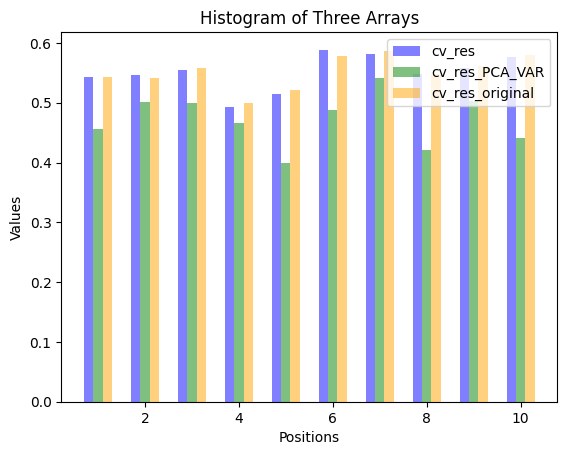

In [78]:
print(cv_res)
print(cv_res_PCA_VAR)
print(cv_res_original)


positions = np.arange(1, len(cv_res) + 1) 

plt.bar(positions - 0.2, cv_res, width=0.2, alpha=0.5, label='cv_res', color='blue')
plt.bar(positions, cv_res_PCA_VAR, width=0.2, alpha=0.5, label='cv_res_PCA_VAR', color='green')
plt.bar(positions + 0.2, cv_res_original, width=0.2, alpha=0.5, label='cv_res_original', color='orange')

plt.legend(loc='upper right')
plt.title('Histogram of Three Arrays')
plt.xlabel('Positions')
plt.ylabel('Values')
plt.show()

In [30]:

# It is not neseccary to create these 3 models, it is jsut simpler to follow.

# This is the result of the grid search
eps = 0.36

SVR1 = svm.SVR(C=0.1, epsilon=eps)
cv_res = cross_val_score(SVR1, X_new,Y['score'], cv=10)

SVR2 = svm.SVR(C=0.1, epsilon=eps)
cv_res_PCA_VAR = cross_val_score(SVR2, X_new_PCA ,Y['score'], cv=10)

SVR3 = svm.SVR(C=0.1, epsilon=eps)
cv_res_original = cross_val_score(SVR3, X ,Y['score'], cv=10)

In [22]:
X_new_PCA.shape


(1976, 269)

In [20]:
X_new.shape

(1976, 370)

[0.4822041  0.52328112 0.48462793 0.47876847 0.48985893 0.53357154
 0.55875657 0.48430225 0.55435651 0.45217813]
[0.48220467 0.52328112 0.48462802 0.47876846 0.48985898 0.53357155
 0.55874795 0.48430249 0.55434435 0.45217823]
[0.22891239 0.27206078 0.2122497  0.25098454 0.23586989 0.27223939
 0.27911372 0.21597886 0.29252649 0.2040794 ]


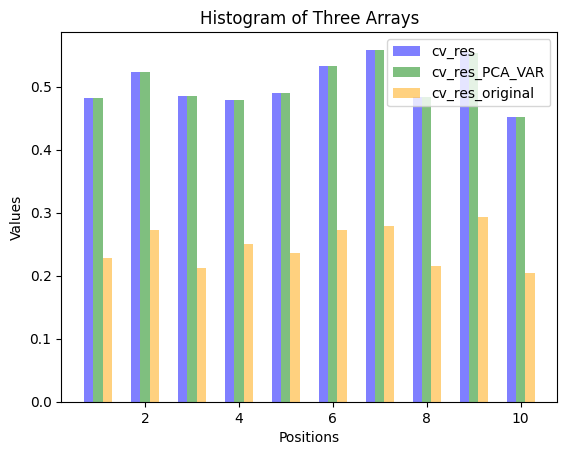

In [18]:
print(cv_res)
print(cv_res_PCA_VAR)
print(cv_res_original)


positions = np.arange(1, len(cv_res) + 1) 

plt.bar(positions - 0.2, cv_res, width=0.2, alpha=0.5, label='cv_res', color='blue')
plt.bar(positions, cv_res_PCA_VAR, width=0.2, alpha=0.5, label='cv_res_PCA_VAR', color='green')
plt.bar(positions + 0.2, cv_res_original, width=0.2, alpha=0.5, label='cv_res_original', color='orange')

plt.legend(loc='upper right')
plt.title('Histogram of Three Arrays')
plt.xlabel('Positions')
plt.ylabel('Values')
plt.show()

In [33]:
SVR3_fitted=SVR3.fit(X,Y['score'])
Final_y=SVR3_fitted.predict(Final_X_test)
WriteOutput(Final_y,"SVR_0108.csv")
# In case of SVM Original did way better, than others, which is suprising, because it has lot of redundant and correlated attributes...
# It seems it stil finds a way to fit and generalize well.

In [98]:
# Here I have tried different types of degree values. Nothing changed, Ive got the same value (0.697)


eps = 0.36
SVR1 = svm.SVR(degree=1,C=0.1, epsilon=eps)
model = SVR1.fit(X_train_dropped_PCA,Y_train)
y_pred = model.predict(X_test_dropped_PCA)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
rmse


0.6972332465920398

In [59]:

# Same for XGBoost forest:
# It is not neseccary to create these 3 models, it is jsut simpler to follow.
rf1 = XGBRegressor(n_estimators=80, random_state=42)
cv_res = cross_val_score(rf1, X_new,Y['score'], cv=10)

rf2 = XGBRegressor(n_estimators=80, random_state=42)
cv_res_PCA_VAR = cross_val_score(rf2, X_new_PCA ,Y['score'], cv=10)

rf3 = XGBRegressor(n_estimators=80, random_state=42)
cv_res_original = cross_val_score(rf3, X ,Y['score'], cv=10)

[0.53864151 0.52912197 0.52767575 0.53244645 0.45989638 0.56808493
 0.49976907 0.47353217 0.55045968 0.58235911]
[0.42319193 0.47905244 0.44171643 0.43531934 0.4362265  0.51437931
 0.4945979  0.49701174 0.51029832 0.44400927]
[0.56978352 0.55299304 0.52105946 0.5524909  0.51768941 0.57572878
 0.5334269  0.49373503 0.49715777 0.5843837 ]


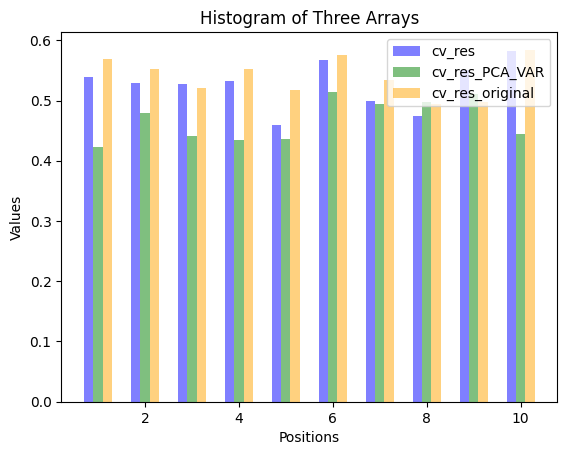

In [60]:
print(cv_res)
print(cv_res_PCA_VAR)
print(cv_res_original)


positions = np.arange(1, len(cv_res) + 1) 

plt.bar(positions - 0.2, cv_res, width=0.2, alpha=0.5, label='cv_res', color='blue')
plt.bar(positions, cv_res_PCA_VAR, width=0.2, alpha=0.5, label='cv_res_PCA_VAR', color='green')
plt.bar(positions + 0.2, cv_res_original, width=0.2, alpha=0.5, label='cv_res_original', color='orange')

plt.legend(loc='upper right')
plt.title('Histogram of Three Arrays')
plt.xlabel('Positions')
plt.ylabel('Values')
plt.show()

In [78]:
# It is not neseccary to create these 3 models, it is jsut simpler to follow.
from sklearn.neighbors import KNeighborsRegressor

knn1 = KNeighborsRegressor(n_neighbors=120,weights='distance')
cv_res = cross_val_score(knn1, X_new,Y['score'], cv=10)

knn2 = KNeighborsRegressor(n_neighbors=120,weights='distance')
cv_res_PCA_VAR = cross_val_score(knn2, X_new_PCA ,Y['score'], cv=10)

knn3 = KNeighborsRegressor(n_neighbors=120,weights='distance')
cv_res_original = cross_val_score(knn3, X ,Y['score'], cv=10)

[0.46878134 0.52550671 0.5013543  0.467277   0.45951296 0.49800221
 0.56314322 0.464224   0.5220441  0.45329946]
[0.46878134 0.52550671 0.5013543  0.467277   0.45951296 0.49800221
 0.56314322 0.464224   0.5220441  0.45329946]
[0.22597897 0.27000673 0.2097155  0.22650022 0.21059245 0.2752538
 0.25726055 0.18577871 0.26636399 0.19278713]


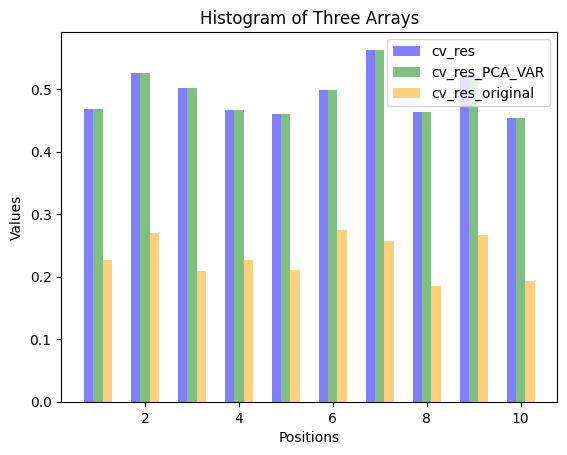

In [79]:
print(cv_res)
print(cv_res_PCA_VAR)
print(cv_res_original)


positions = np.arange(1, len(cv_res) + 1) 

plt.bar(positions - 0.2, cv_res, width=0.2, alpha=0.5, label='cv_res', color='blue')
plt.bar(positions, cv_res_PCA_VAR, width=0.2, alpha=0.5, label='cv_res_PCA_VAR', color='green')
plt.bar(positions + 0.2, cv_res_original, width=0.2, alpha=0.5, label='cv_res_original', color='orange')

plt.legend(loc='upper right')
plt.title('Histogram of Three Arrays')
plt.xlabel('Positions')
plt.ylabel('Values')
plt.show()

In [80]:
model= knn3.fit(X_train,Y_train)
pred = knn3.predict(X_test)
mean_squared_error(Y_test,pred)

0.7451021224543334